# University Admission Prediction Using XGBoost Regression

## Import Dependencies

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import pickle
plt.style.use('dark_background')

## Load the Dataset

In [3]:
df = pd.read_csv('university_admission.csv')
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Check for null values

In [4]:
df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

## Check the distribution of each variables

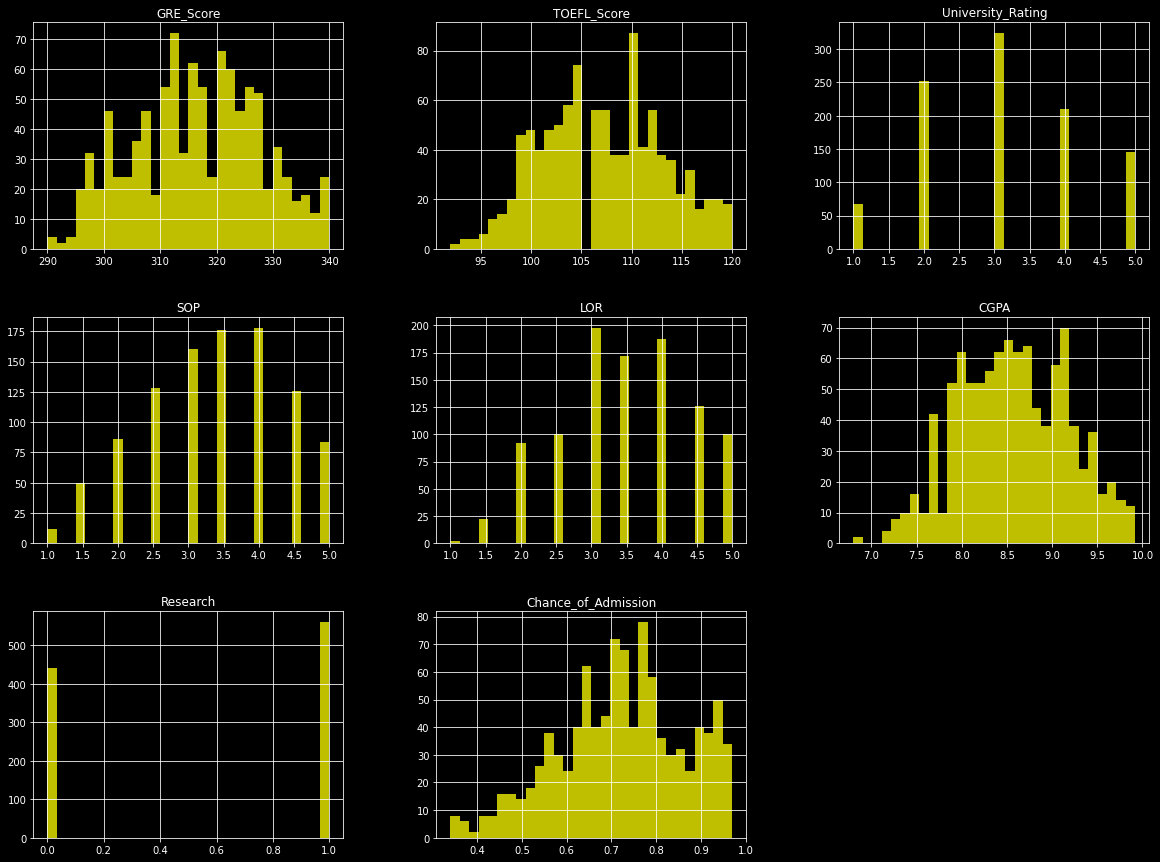

In [5]:
df.hist(figsize=(20, 15), bins=30, color='y')
plt.show()

## Visualize the Data

### Correlation Matrix

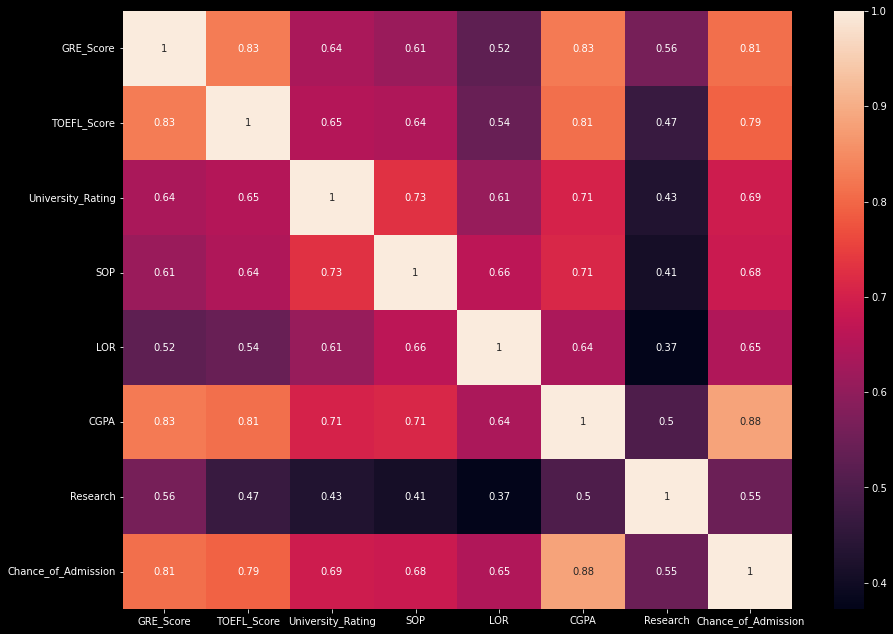

In [6]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Pairplot

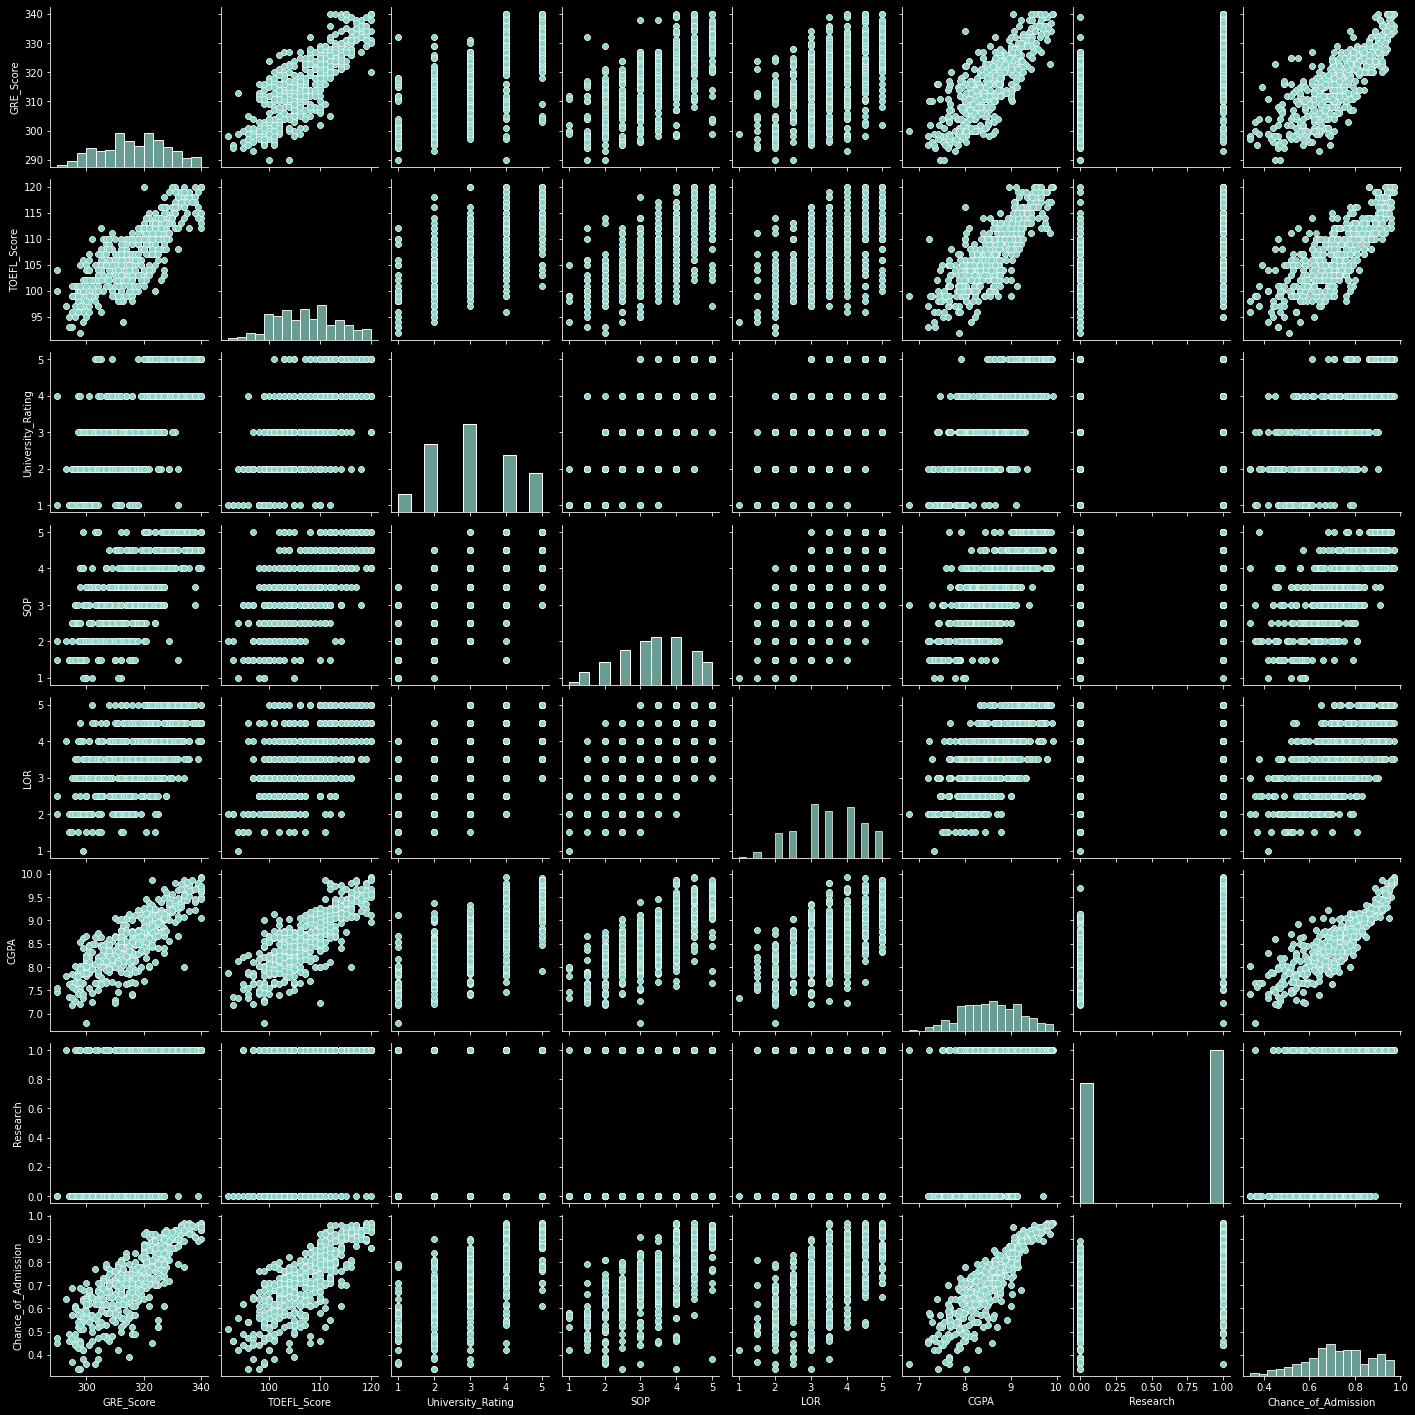

In [7]:
# plt.figure(figsize=(20, 15))
sns.pairplot(df)
plt.show()

### Check the relationship between the target and feature using scatterplot

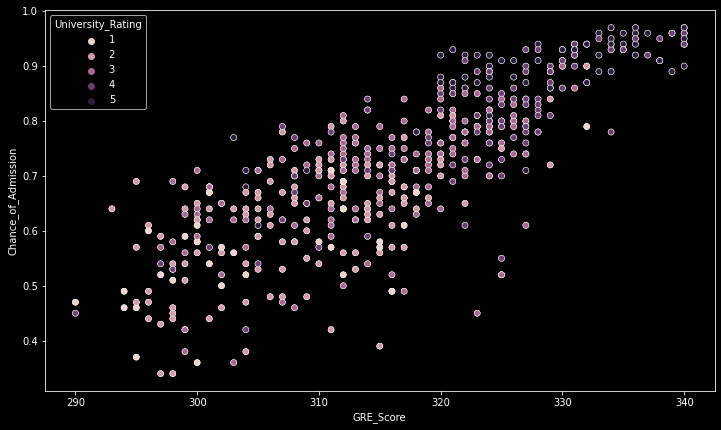

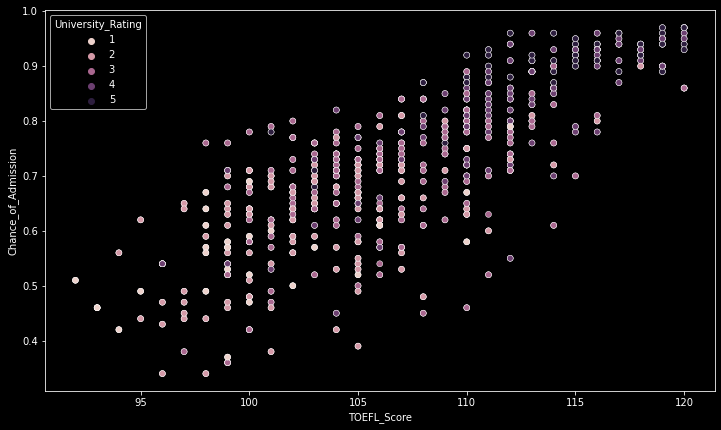

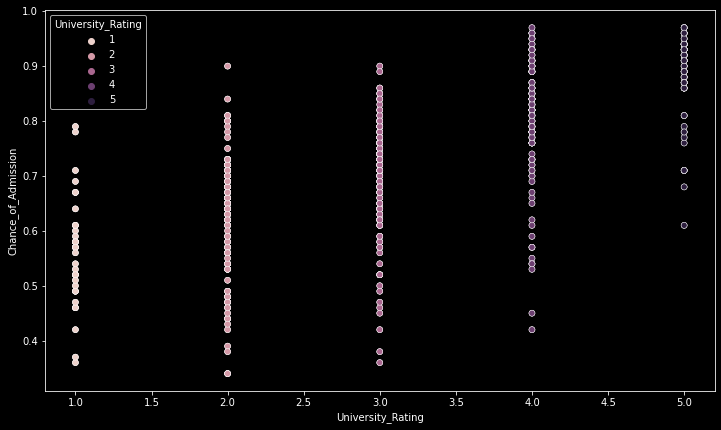

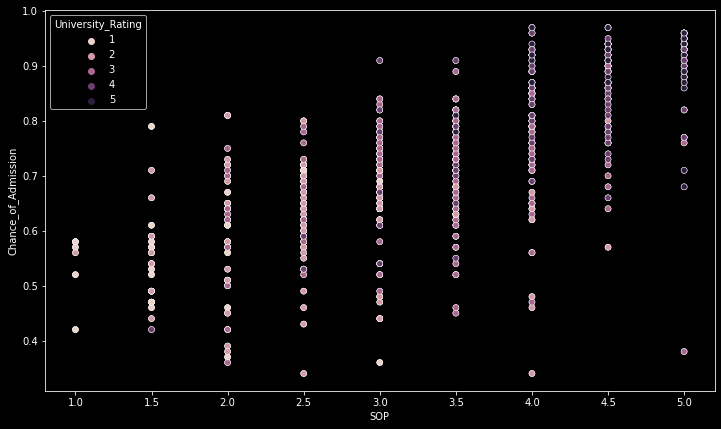

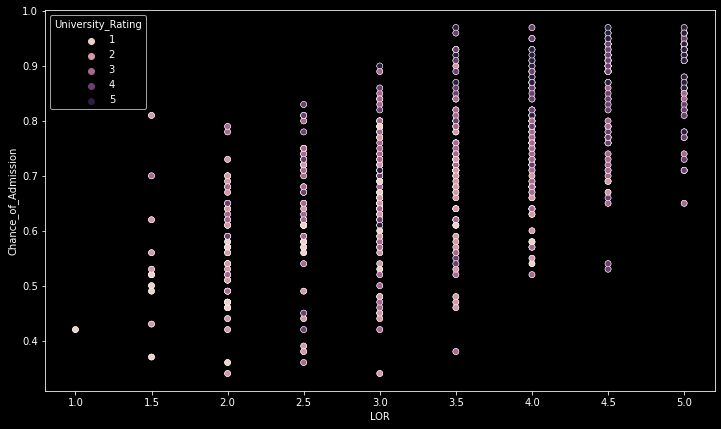

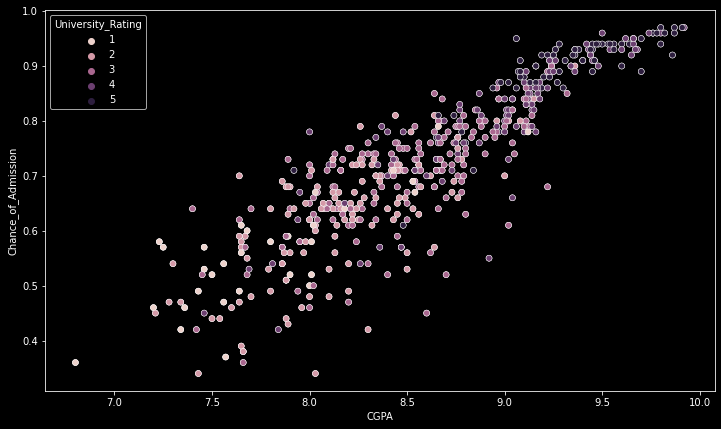

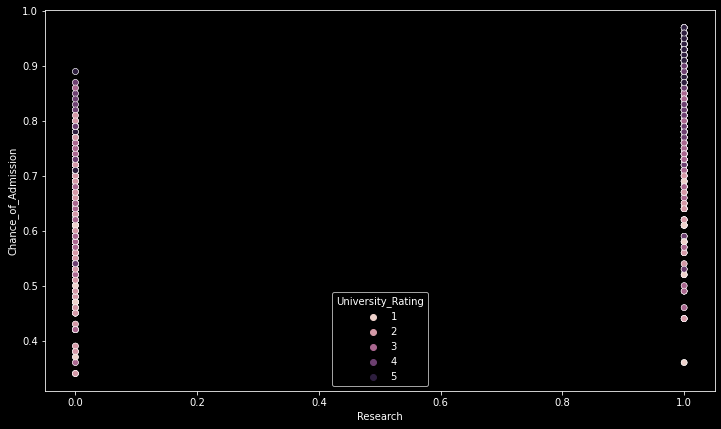

In [8]:
features = df.drop(columns='Chance_of_Admission')
for col in features.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x=col, y='Chance_of_Admission', hue='University_Rating', data=df)
    plt.show()

## Prepare the Data for Training

In [9]:
X = features
y = df[['Chance_of_Admission']]

In [10]:
print(X.shape)
print(y.shape)

(1000, 7)
(1000, 1)


### Split the training and testing data

In [11]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

## Build the machine learning model

In [24]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=50, n_estimators=1000)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=50, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Model Evaluation

In [27]:
xgb_predictions = xgb_model.predict(x_test)
print(f'Mean Absolute Error:  {sklearn.metrics.mean_absolute_error(xgb_predictions, y_test):.3f}')
print(f'Mean Squared Error:  {sklearn.metrics.mean_squared_error(xgb_predictions, y_test):.3f}')
print(f'R2 Score:  {sklearn.metrics.r2_score(xgb_predictions, y_test):.3f}')

Mean Absolute Error:  0.014
Mean Squared Error:  0.001
R2 Score:  0.933


## Save the Model

In [15]:
pickle.dump(xgb_model, open('university_admission_predictor.sav', 'wb'))